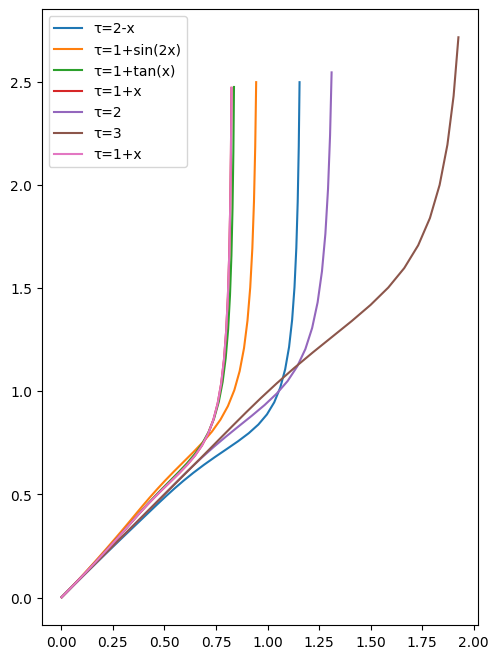

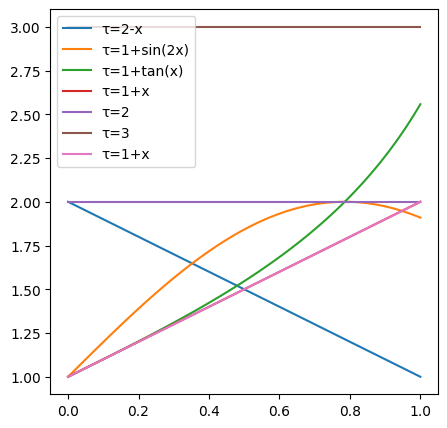

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

freq_list=np.logspace(-1.3,5,100)


#needs an array of frequency

def give_z_for_arbitary_tau(tau,freq_list,ax,name):
    
    def fun(x,y,lmd):
        return np.vstack((y[2]*tau(x),y[3]*tau(x),-lmd*y[1],lmd*y[0]))

    def bc(ya,yb):
        return np.array([ya[0]-1,yb[2],yb[3],ya[1]])

    
    freq=100
    w=2*np.pi*freq
    a=2000
    Cdl=6.61e-4
    k=1
    eps=0.5

    x=np.linspace(0,1,100)
    y=np.zeros((4,x.size))

    Z_list=np.zeros((np.size(freq_list),1),dtype=complex)
    ii=0
    for f in freq_list:
        w=2*np.pi*f
        lmd=w*a*Cdl/(k*eps)
        sol1 = solve_bvp(lambda x,y: fun(x,y,lmd=lmd), bc, x, y)
        y3=sol1.sol(x)[2]
        y4=sol1.sol(x)[3]
        Z=1/(-k*eps*(y3[0]+y4[0]*1j)) ##keff in place of k
        Z_list[ii]=Z
        ii=ii+1

    Z_list_real=np.real(Z_list)
    Z_list_imag=np.imag(Z_list)

    ax.plot(Z_list_real,-Z_list_imag,label=name)
    ax.set_aspect("equal")

def tau_plotter(tau,ax,name):
    x=np.linspace(0,1,100)
    ax.plot(x,tau(x),label=name)

fig, ax=plt.subplots()
fig.set_size_inches(8,8)

fig2, ax2=plt.subplots()
fig2.set_size_inches(5,5)
# give_z_for_arbitary_tau(tau,freq_list,ax)
# give_z_for_arbitary_tau(tau1,freq_list,ax)
# give_z_for_arbitary_tau(tau2,freq_list,ax)
# def tau(x):
#     return 1+np.sqrt(x)
# give_z_for_arbitary_tau(tau,freq_list,ax,"1+sqrt(x)")
# tau_plotter(tau,ax2,"1+sqrt(x)")

def tau1(x):
    return 2-x
give_z_for_arbitary_tau(tau1,freq_list,ax,"τ=2-x")
tau_plotter(tau1,ax2,"τ=2-x")

# def tau2(x):
#     return 1+1/(1+np.sqrt(x))
# give_z_for_arbitary_tau(tau2,freq_list,ax,"1+1/(1+sqrt(x))")
# tau_plotter(tau2,ax2,"1+1/(1+sqrt(x))")

def tau3(x):
    return 1+np.sin(2*x)
give_z_for_arbitary_tau(tau3,freq_list,ax,"τ=1+sin(2x)")
tau_plotter(tau3,ax2,"τ=1+sin(2x)")

def tau4(x):
    return 1+np.tan(x)
give_z_for_arbitary_tau(tau4,freq_list,ax,"τ=1+tan(x)")
tau_plotter(tau4,ax2,"τ=1+tan(x)")

def tau5(x):
    return 1+x
give_z_for_arbitary_tau(tau5,freq_list,ax,"τ=1+x")
tau_plotter(tau5,ax2,"τ=1+x")

# def tau6(x):
#     return 1/((1/2)+(1/4-1/2)*x)
# give_z_for_arbitary_tau(tau6,freq_list,ax,"1/(1/2+(1/4-1/2)x)")
# tau_plotter(tau6,ax2,"1/(1/2+(1/4-1/2)x)")

def tau7(x):
    return 1+x**0
give_z_for_arbitary_tau(tau7,freq_list,ax,"τ=2")
tau_plotter(tau7,ax2,"τ=2")

def tau8(x):
    return 2+x**0
give_z_for_arbitary_tau(tau8,freq_list,ax,"τ=3")
tau_plotter(tau8,ax2,"τ=3")

def tau9(x):
    return 1+x
give_z_for_arbitary_tau(tau9,freq_list,ax,"τ=1+x")
tau_plotter(tau9,ax2,"τ=1+x")

ax.legend()
ax2.legend()

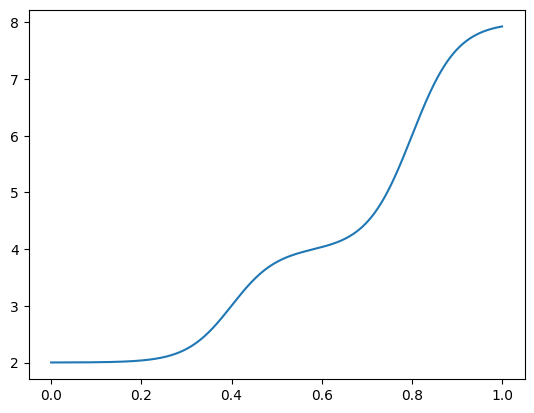

In [32]:
xx=np.linspace(0,1,1000)
plt.plot(xx,5+np.tanh(xx*10-4)+2*np.tanh(xx*10-8))
#plt.plot(xx,2+np.tanh(xx))
#R=l/(keff*A)